# Reporte ejemplo usando libreria de visualización CTG_VIZ

Datos de: [CTG.csv – Cardiotocography Data Set (Kaggle)](https://www.kaggle.com/code/akshat0007/cardiotocology/data)

1. Descripción de funciones: [examples.ipynb](../notebooks/examples.ipynb)
2. Descripción de visualizaciones: [examples.ipynb](../notebooks/examples.ipynb)


3. Análisis de dataset de Kaggle:

In [1]:
# Importar funciones creadas
import sys
sys.path.insert(0, "../")

from ctg_viz import categorization as categ
from ctg_viz import utils
from ctg_viz.plots import histograms_cat, line, heatmap

In [2]:
import pandas as pd


In [3]:
data_path = '../data/CTG.csv' # Data must be stored in the data/ folder after you download the file. You can also modify the path
df = pd.read_csv(data_path)

In [4]:
utils.check_data_completeness_alejandro_sosa_murguia(df)

,Column,Data Type,Non-Null Count,Null Count,Completeness (%),Mean,Median,Std Dev,Min,Max
0,FileName,object,2126,3,99.859089,NaN,NaN,NaN,NaN,NaN
1,Date,object,2126,3,99.859089,NaN,NaN,NaN,NaN,NaN
2,SegFile,object,2126,3,99.859089,NaN,NaN,NaN,NaN,NaN
3,b,float64,2126,3,99.859089,878.439793,538.0,894.084748,0.0,3296.0
4,e,float64,2126,3,99.859089,1702.877234,1241.0,930.919143,287.0,3599.0
5,LBE,float64,2126,3,99.859089,133.303857,133.0,9.840844,106.0,160.0
6,LB,float64,2126,3,99.859089,133.303857,133.0,9.840844,106.0,160.0
7,AC,float64,2126,3,99.859089,2.722484,1.0,3.560850,0.0,26.0
8,FM,float64,2127,2,99.906059,7.503056,0.0,39.030452,0.0,564.0
9,UC,float64,2127,2,99.906059,3.669017,3.0,2.877148,0.0,23.0


Podemos ver que en casi todas las columnas hay 1 o 3 valores nulos. Podemos imputar valores o simplemente removerlos, ya que representan menos del 2%.

In [5]:
df.dropna(inplace=True)

In [6]:
df.shape[0]

2126

Se conservan los 2126 registros que se mostraron en el reporte anterior.

En la descripción de los datos se menciona que son Cardiocotogramas ferales, procesados y clasificados por 3 expertos en obstentricia. 

La clasificación fue hecha respecto a patrones morfológicos (A,B,C,...) y estados fetales (N,S,P). Por lo tanto, se sugiere que el dataset se puede usar como experimentos de 10 clases o de 3 clases.

La descripción de las columnas es la siguiente:
|Column|Description|
|-|-|
**FileName** | of CTG examination  
**Date** | of the examination  
**b** | start instant  
**e** | end instant  
**LBE** | baseline value (medical expert)  
**LB** | baseline value (SisPorto)  
**AC** | accelerations (SisPorto)  
**FM** | foetal movement (SisPorto)  
**UC** | uterine contractions (SisPorto)  
**ASTV** | percentage of time with abnormal short term variability (SisPorto)  
**mSTV** | mean value of short term variability (SisPorto)  
**ALTV** | percentage of time with abnormal long term variability (SisPorto)  
**mLTV** | mean value of long term variability (SisPorto)  
**DL** | light decelerations  
**DS** | severe decelerations  
**DP** | prolongued decelerations  
**DR** | repetitive decelerations  
**Width** | histogram width  
**Min** | low freq. of the histogram  
**Max** | high freq. of the histogram  
**Nmax** | number of histogram peaks  
**Nzeros** | number of histogram zeros  
**Mode** | histogram mode  
**Mean** | histogram mean  
**Median** | histogram median  
**Variance** | histogram variance  
**Tendency** | histogram tendency: -1=left assymetric; 0=symmetric; 1=right assymetric  
**A** | calm sleep  
**B** | REM sleep  
**C** | calm vigilance  
**D** | active vigilance  
**SH** | shift pattern (A or Susp with shifts)  
**AD** | accelerative/decelerative pattern (stress situation)  
**DE** | decelerative pattern (vagal stimulation)  
**LD** | largely decelerative pattern  
**FS** | flat-sinusoidal pattern (pathological state)  
**SUSP** | suspect pattern  
**CLASS** | Class code (1 to 10) for classes A to SUSP  
**NSP** | Normal=1; Suspect=2; Pathologic=3  

Como análisis exploratorio inicial, suponiendo que no tenemos conocimiento del tema, podemos visualizar algunas distribuciones y observar la correlacion entre ellas.

In [7]:
column_types = categ.classify_column_types(df)

In [8]:
column_types['categorical']

['FileName', 'Date', 'SegFile']

In [9]:
column_types['continuous_numerical']

['b',
 'e',
 'LBE',
 'LB',
 'AC',
 'FM',
 'UC',
 'ASTV',
 'MSTV',
 'ALTV',
 'MLTV',
 'DL',
 'Width',
 'Min',
 'Max',
 'Nmax',
 'Mode',
 'Mean',
 'Median',
 'Variance']

In [10]:
column_types['discrete_numerical']

['DS',
 'DP',
 'DR',
 'Nzeros',
 'Tendency',
 'A',
 'B',
 'C',
 'D',
 'E',
 'AD',
 'DE',
 'LD',
 'FS',
 'SUSP',
 'CLASS',
 'NSP']

In [11]:

#1. Frequency of files by date
#2. Time between studies
#3. Distribution of continuous variables
#4. Correlation between continuous variables

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
data = df[['FileName', 'Date']].groupby('Date').agg(['count', 'nunique'])

In [14]:
data.columns = ['_'.join(c) for c in data.columns]

In [15]:
data['year'] = data.index.year

In [16]:
data_year = data.groupby('year').sum()

In [17]:
line.line_plotly(data_year, ['FileName_nunique'])

Podemos ver que la mayoría de los estudios fueron realizados en 1995 (99) y 1996 (191).  
Tal vez por la vejez de los datos, podríamos omitir aquellos de 1980 (17) para evitar inconsistencias

In [18]:
df = df[df['Date'] > '1981']

In [19]:
c_col = column_types['continuous_numerical']


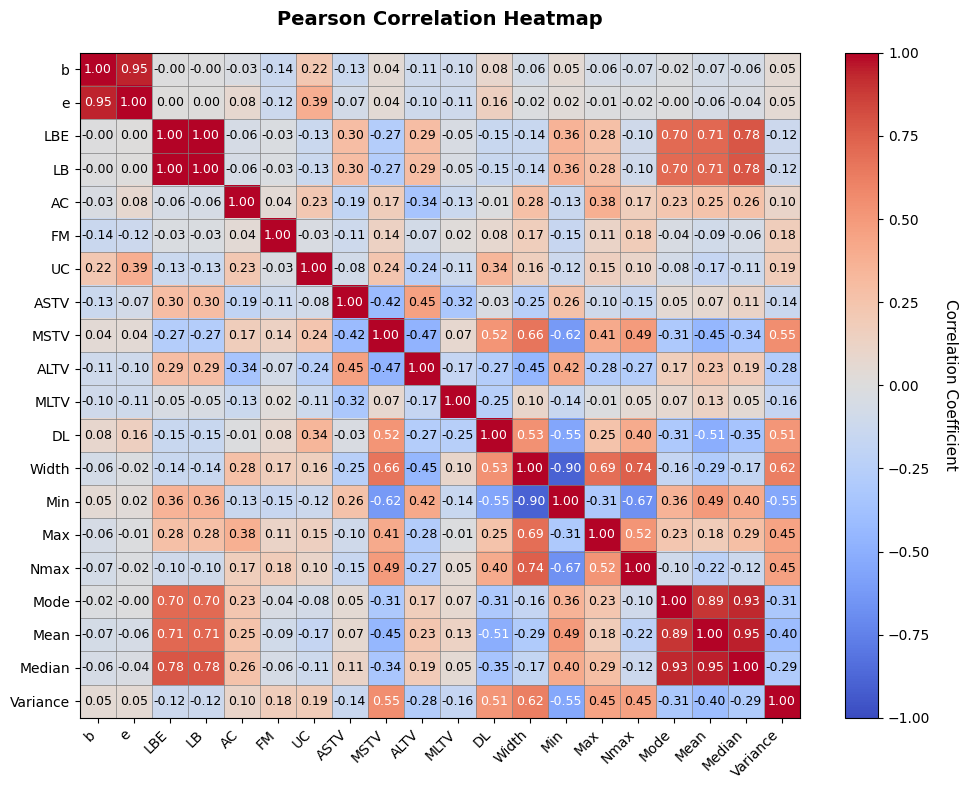

In [20]:
heatmap.corr_heatmap_matplotlib(df, c_col);

Podemos observar que la mayoría de las variables tienen una correlación menor a 0.7

In [21]:
corr_matrix = df[c_col].corr()

In [22]:
high_corr_pairs = {}
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)): # Iterate only through the upper triangle to avoid duplicates
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        correlation_value = corr_matrix.loc[col1, col2]

        if abs(correlation_value) > 0.70:
            high_corr_pairs[(col1, col2)] = correlation_value

In [23]:
high_corr_pairs

{('b', 'e'): np.float64(0.945106813646403),
 ('LBE', 'LB'): np.float64(1.0),
 ('LBE', 'Mode'): np.float64(0.7040579215979661),
 ('LBE', 'Mean'): np.float64(0.7147439147056938),
 ('LBE', 'Median'): np.float64(0.7844472548290392),
 ('LB', 'Mode'): np.float64(0.7040579215979661),
 ('LB', 'Mean'): np.float64(0.7147439147056938),
 ('LB', 'Median'): np.float64(0.7844472548290392),
 ('Width', 'Min'): np.float64(-0.8978795291309927),
 ('Width', 'Nmax'): np.float64(0.7447032733724135),
 ('Mode', 'Mean'): np.float64(0.8915125925108994),
 ('Mode', 'Median'): np.float64(0.9321680366342999),
 ('Mean', 'Median'): np.float64(0.9465071885367787)}

1. Podemos observar que muchas vairables con una fuerte correlación son medidas centrales como ma media y la mediana.  
2. En los casos de b y e la correlación se debe a que representan el inicio del proceso y el final del proceso.  
3. En el caso de Width, al representar el ancho del gráfico de histograma del estudio, tiene una correlación con los valores máximos y mínimos.
3. Las correlaciones más interesantes de observan en las variables LBE, LB, ya que no son valores que representen funciones de agregación.

In [24]:
df['E'].value_counts()

E
0.0    2002
1.0      68
Name: count, dtype: int64

In [25]:
histograms_cat.histogram_plotly(df, 'LBE', 'NSP')

In [26]:
histograms_cat.histogram_plotly(df, 'UC', 'NSP')

In [27]:
histograms_cat.histogram_plotly(df, 'AC', 'NSP')

In [28]:
histograms_cat.histogram_plotly(df, 'DL', 'NSP')

Visualizando algunas variables continuas, podemos observar que separados por la variable NSP; DL, AC, LBE, UC  presentan variaciones en las distribuciones.  
Estos podrían ser buenos estimadores para detectarlos

**Recomendaciones finales para estudios posteriores**:
* Utilizar datos de 1995-1998, ya que los datos de 1980 tienen una diferencia muy grande de años. Esto podría sugerir algún riesgo en la calidad de los datos.
* Los valores faltantes son mínimos (menos del 2%), por lo que es recomendable omitirlos del estudio.
* Utilizar las variables DL, AC, LBE, UC para poder detectar a la variable NSP (Los estados fetales).
* Dado que las correlaciones de las medidas de histograma son altas con LBE y LB, se podrían poner a prueba su poder predictivo y quedarse con la mejor y evitar todas. Eso podría eficientizar procesos de automatización de ser necesarios.
* Usar ingeniería de variables y un análisis más robusto para las columnas que reoresentan valores de histogramas (Width, Min, Nmax, etc.)